#

# 11. Support Vector Machine

## CPE 490 590
## Rahul Bhadani

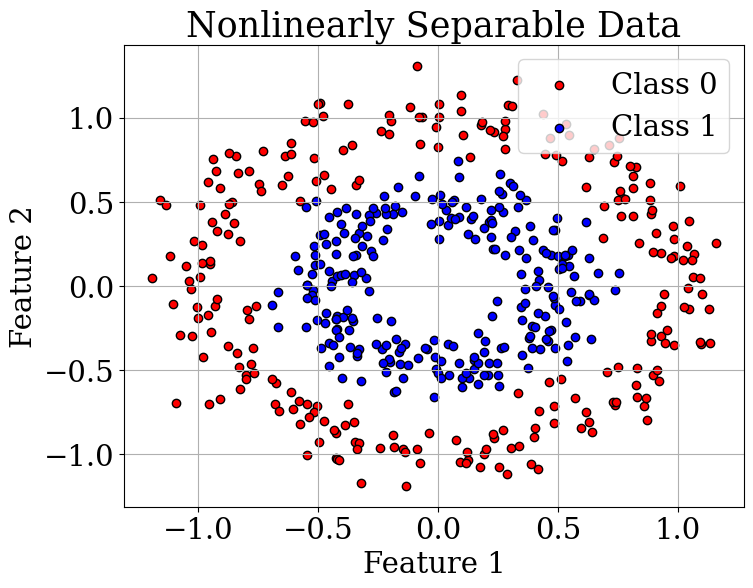

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 21

# Generate nonlinearly separable data
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', edgecolors='k')
plt.title('Nonlinearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('../figures/nonlinearly_separable_data.pdf', format='pdf')

# Show the plot
plt.show()

# Hyperplane Equation

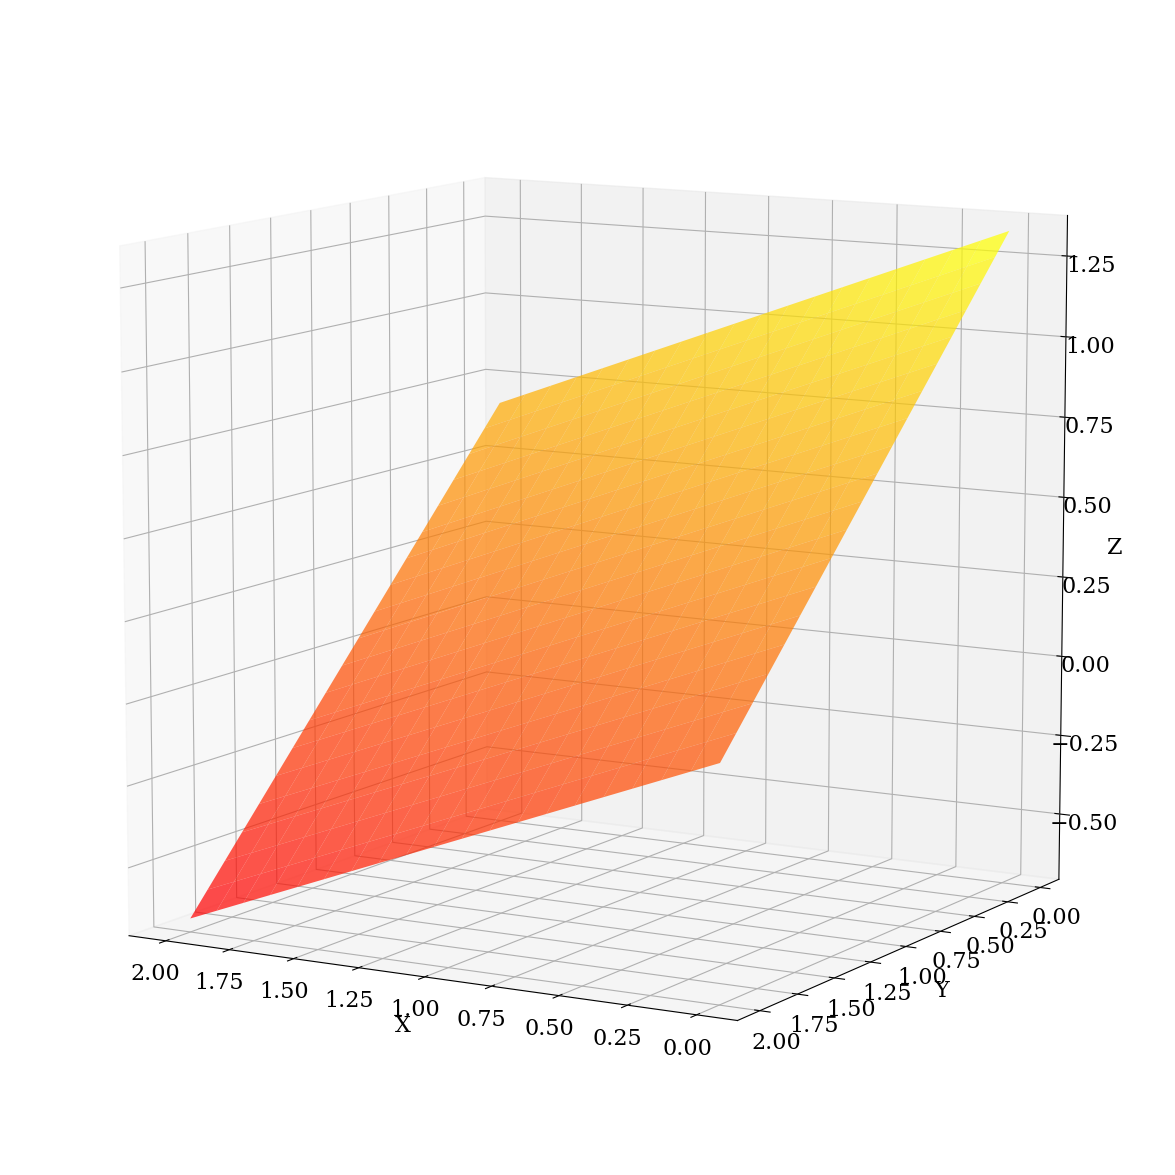

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the hyperplane parameters
w = np.array([1, 2, 3])
beta = 4

# Choose a point x0 in 3D space
x0 = np.array([1, 1, 2])

# Calculate the projection of x0 onto the hyperplane
w_dot_x0 = np.dot(w, x0)
numerator = w_dot_x0 - beta
denominator = np.dot(w, w)
proj = x0 - (numerator / denominator) * w

# Create a meshgrid for the hyperplane
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)
X, Y = np.meshgrid(x, y)
Z = (beta - w[0]*X - w[1]*Y) / w[2]

# Create the 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the hyperplane with red-yellow colormap
surf = ax.plot_surface(X, Y, Z, cmap='autumn', alpha=0.7)


# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=10, azim=120) 
ax.set_box_aspect((1, 1, 1))

# Save the figure as PDF
plt.savefig('hyperplane.pdf', format='pdf', bbox_inches='tight')

plt.show()

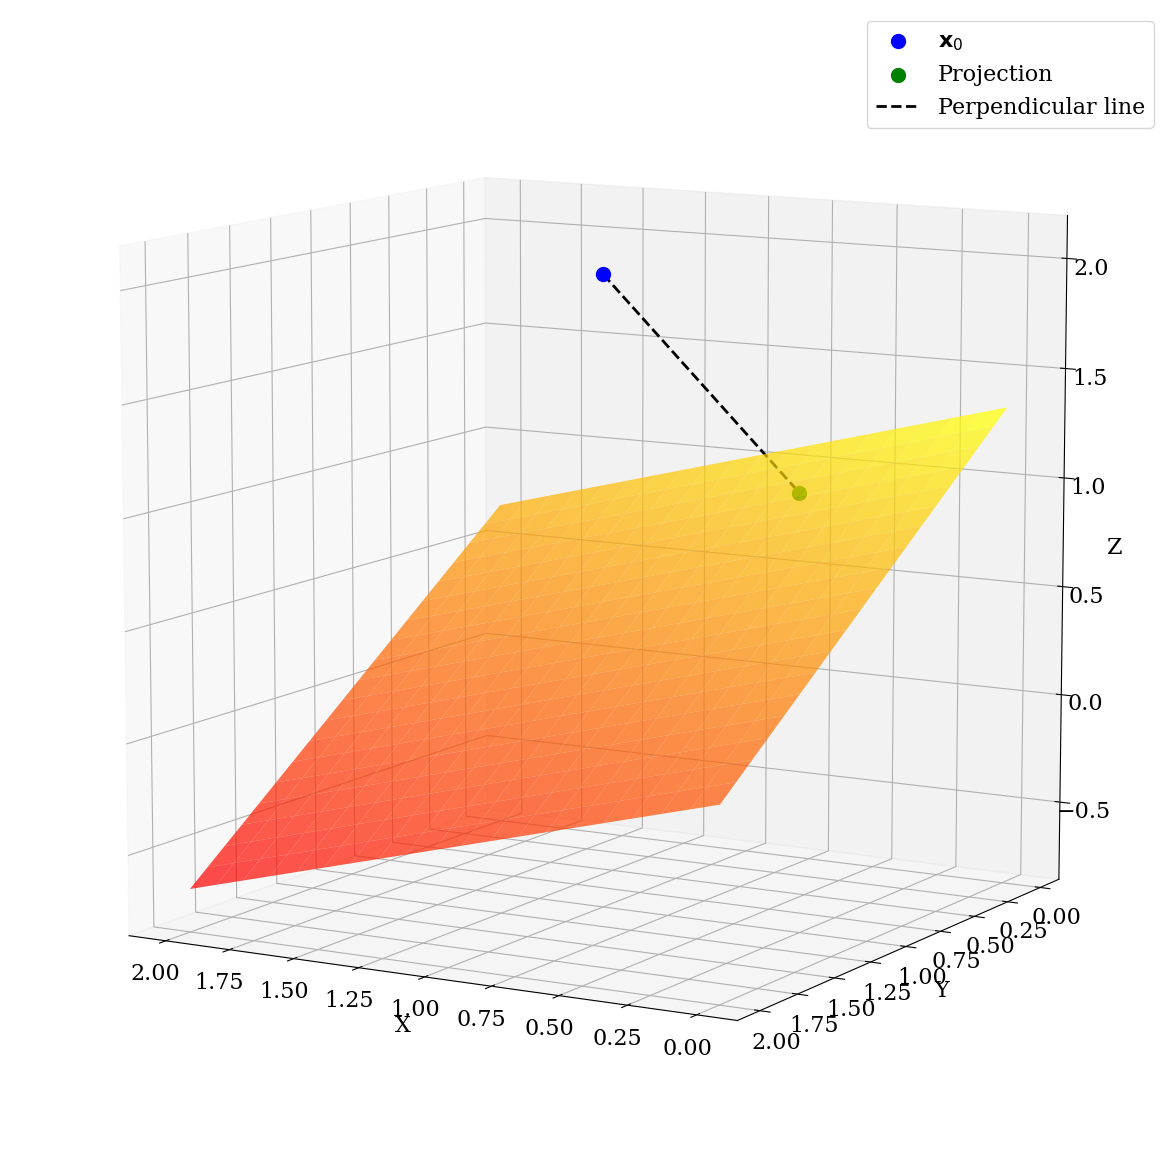

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the hyperplane parameters
w = np.array([1, 2, 3])
beta = 4

# Choose a point x0 in 3D space
x0 = np.array([1, 1, 2])

# Calculate the projection of x0 onto the hyperplane
w_dot_x0 = np.dot(w, x0)
numerator = w_dot_x0 - beta
denominator = np.dot(w, w)
proj = x0 - (numerator / denominator) * w

# Create a meshgrid for the hyperplane
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)
X, Y = np.meshgrid(x, y)
Z = (beta - w[0]*X - w[1]*Y) / w[2]

# Create the 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the hyperplane with red-yellow colormap
surf = ax.plot_surface(X, Y, Z, cmap='autumn', alpha=0.7)

# Plot the original point and its projection
ax.scatter(*x0, color='blue', s=100, label='$\\mathbf{x}_0$')
ax.scatter(*proj, color='green', s=100, label='Projection')

# Draw the perpendicular line connecting x0 to its projection
ax.plot([x0[0], proj[0]], [x0[1], proj[1]], [x0[2], proj[2]], 
        color='black', linestyle='--', linewidth=2, label='Perpendicular line')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.view_init(elev=10, azim=120) 
ax.set_box_aspect((1, 1, 1))  

# Save the figure as PDF
plt.savefig('hyperplane_projection.pdf', format='pdf', bbox_inches='tight')

plt.show()

# 1. SVM: Linear Hyperplane Separation

### Problem: Generate a linearly separarelable dataset consisting of two class, implement support vector machine to separate them. Also create plot in matplotlib to visualize the maximum separation and support vectors.

### Steps:

- **Generate a Linearly Separable Dataset:** We’ll create a synthetic dataset with two classes that are linearly separable. For demonstration purposes, we'll generate random data points using make_blobs from sklearn.datasets.
- **Implement Support Vector Machine (SVM):** We’ll use the `LinearSVC` class from `sklearn.sv`m to train an SVM model on our dataset. This classifier aims to find the optimal hyperplane that maximizes the separation between the two classes.
- **Visualize the Decision Boundary and Support Vectors:** We’ll plot the decision boundary and highlight the support vectors.

## Generation Synethetic Dataset

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 21


# Generate a linearly separable dataset
X, y = make_blobs(n_samples=100, centers=[[2, 2], [-3, -2]], random_state=0)

# Train a Linear SVM

In [72]:

## The large value of C means clearly seaprable case
clf = LinearSVC(C=1e6, loss="hinge", random_state=42, dual="auto").fit(X, y)

# Obtain the support vectors

In [73]:
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]


# Plot the data points and decision boundary

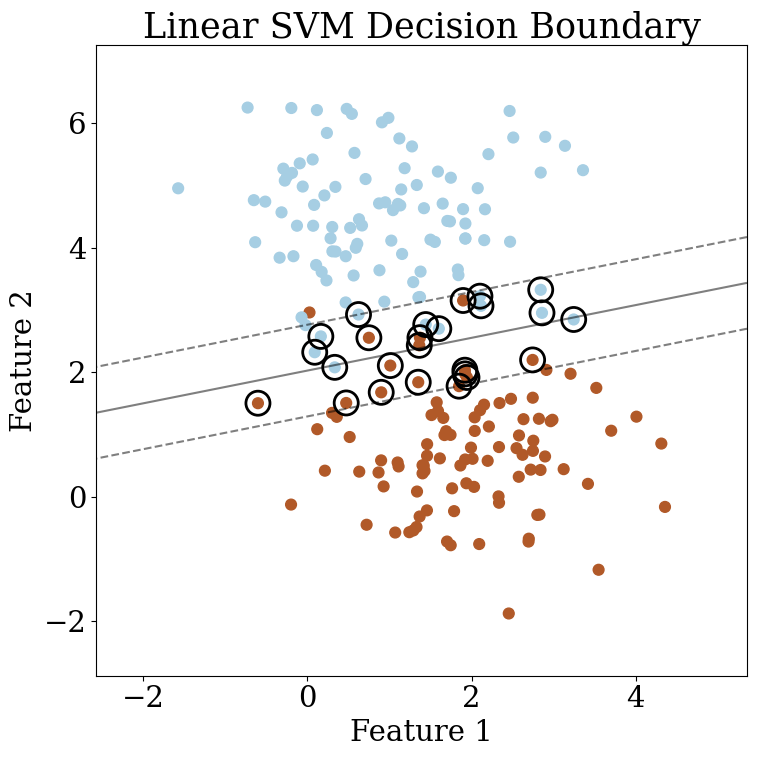

In [94]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, linewidth=2, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
#plt.axis('equal')

plt.show()


# 2. SVM: Linear Hyperplane with Fuzzy Separation

# Generate dataSet that may need some misclassfication

In [84]:
# Generate a linearly separable dataset
X, y = make_blobs(n_samples=200, centers=2, random_state=0)

# Train SVM

## Set C = 1 for penalty (regularzation)

In [85]:
clf = LinearSVC(C=1, loss="hinge", random_state=42, dual="auto", max_iter=2000).fit(X, y)


# Obtain the Support Vectors and Plot

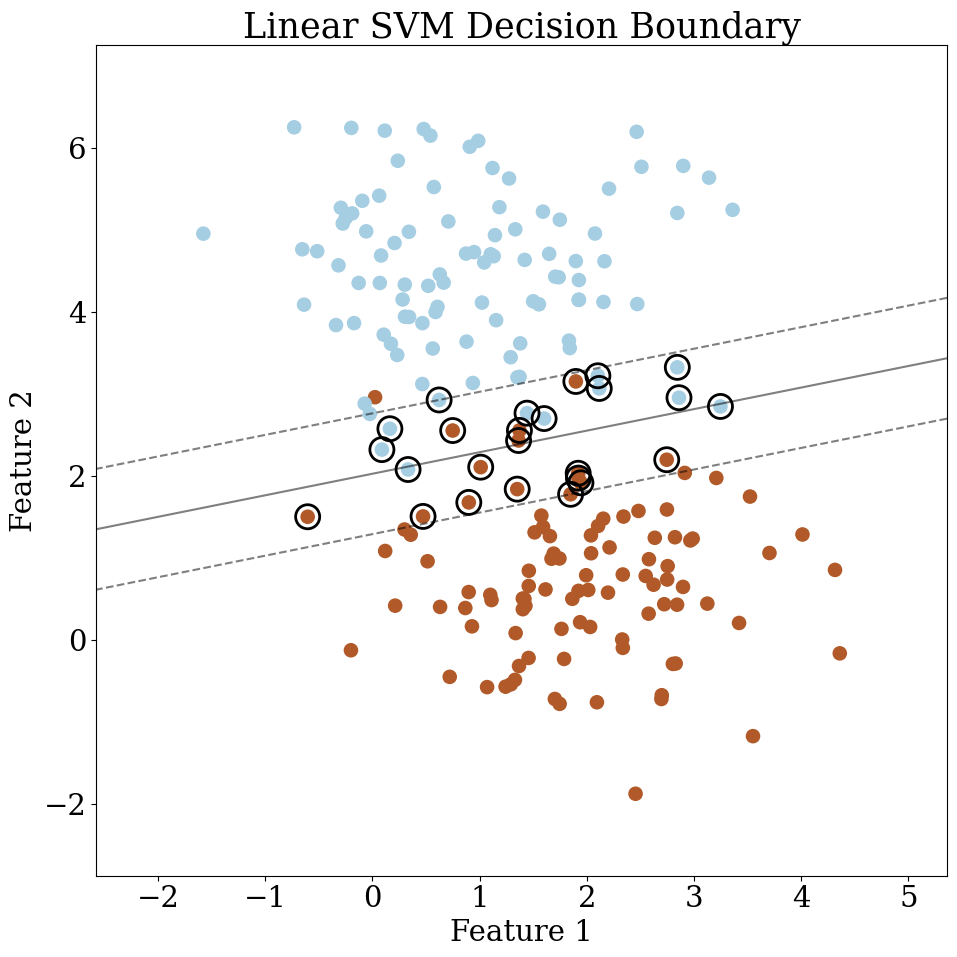

In [93]:
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

# Plot the data points and decision boundary
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=90, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, linewidth=2, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

# 3. Image Classification using SVM

In this notebook, we will read a folder containing two subfolders to train an SVM Classifier to distinguish between images of cats and dogs.
As images are not of the same size, we will be resizing them using OpenCV python package.


In [1]:
import cv2
import os
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

# Define function to load images from given directories


In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize image
            images.append(img)
    return images

# Load images

In [3]:
cats = load_images_from_folder('../Data/CatsDogs/PetImages/Cat/')
dogs = load_images_from_folder('../Data/CatsDogs/PetImages/Dog/')

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


# Create Labels and Combine Data

In [4]:
# Create labels
labels = [0]*len(cats) + [1]*len(dogs)

# Combine data
data = cats + dogs

# Flatten Image and Normalize it

In [5]:
data = [i.flatten() for i in data]
data = np.array(data) / 255.0

# Split data into training and testing sets


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# Train SVM

In [7]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

# Test Accuracy

In [8]:
print('Test Accuracy: ', clf.score(X_test, y_test))

Test Accuracy:  0.6807144290588


# Predict a new image

In [9]:
new_image = cv2.imread('../Data/CatsDogs/dog.jpg')
new_image = cv2.resize(new_image, (64, 64))  # Resize image
new_image = new_image.flatten() / 255.0
print('Prediction: ', 'Dog' if clf.predict([new_image]) else 'Cat')

Prediction:  Dog


In [10]:
new_image = cv2.imread('../Data/CatsDogs/cat.jpg')
new_image = cv2.resize(new_image, (64, 64))  # Resize image
new_image = new_image.flatten() / 255.0
print('Prediction: ', 'Dog' if clf.predict([new_image]) else 'Cat')

Prediction:  Cat


# 4. Nonlinear Separation

### Problem: Generate halfmoon dataset consisting of two class, implement support vector machine to separate them. Also create plot in matplotlib to visualize the maximum separation and support vectors.

## Generation Synethetic Dataset

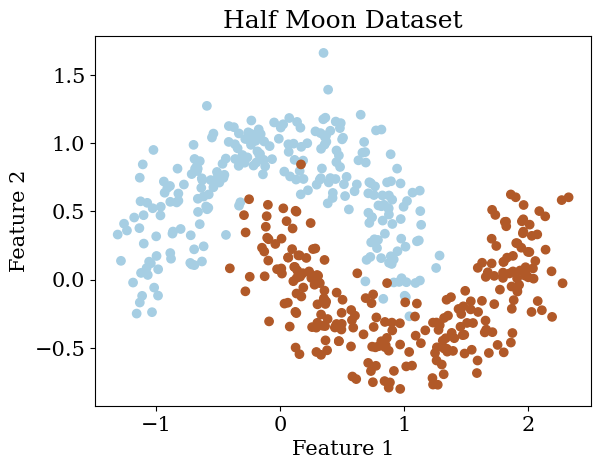

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15


from sklearn.datasets import make_moons

# Generate the half moon dataset
X, y = make_moons(n_samples=500, noise=0.18, shuffle=False)


# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Half Moon Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Train a nonLinear SVM

We’ll use the Support Vector Machine (SVM) algorithm to classify the data. Scikit-learn provides different SVM classifiers, including SVC (for linear kernel), NuSVC, and LinearSVC. Additionally, we’ll explore three different kernel functions: polynomial, Gaussian (RBF), and sigmoid.

In [23]:
from sklearn.svm import SVC, NuSVC, LinearSVC

# Initialize SVM classifiers
clf_linear = SVC(kernel='linear')
clf_poly = SVC(kernel='poly', degree=4, coef0=1, C=5)
clf_rbf = SVC(kernel='rbf', gamma=5, C=0.001)
clf_sigmoid = SVC(kernel='sigmoid', coef0=0.3)

# Fit the classifiers to the data
clf_linear.fit(X, y)
clf_poly.fit(X, y)
clf_rbf.fit(X, y)
clf_sigmoid.fit(X, y)


SVC(coef0=0.3, kernel='sigmoid')

# Plot the decision function for linear seapration

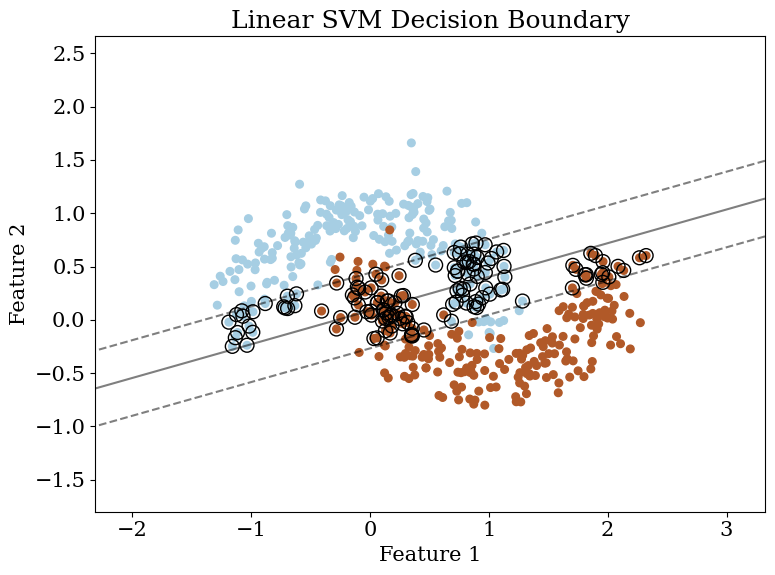

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay
decision_function = clf_linear.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf_linear,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


# Plot the decision function for polynomial seapration

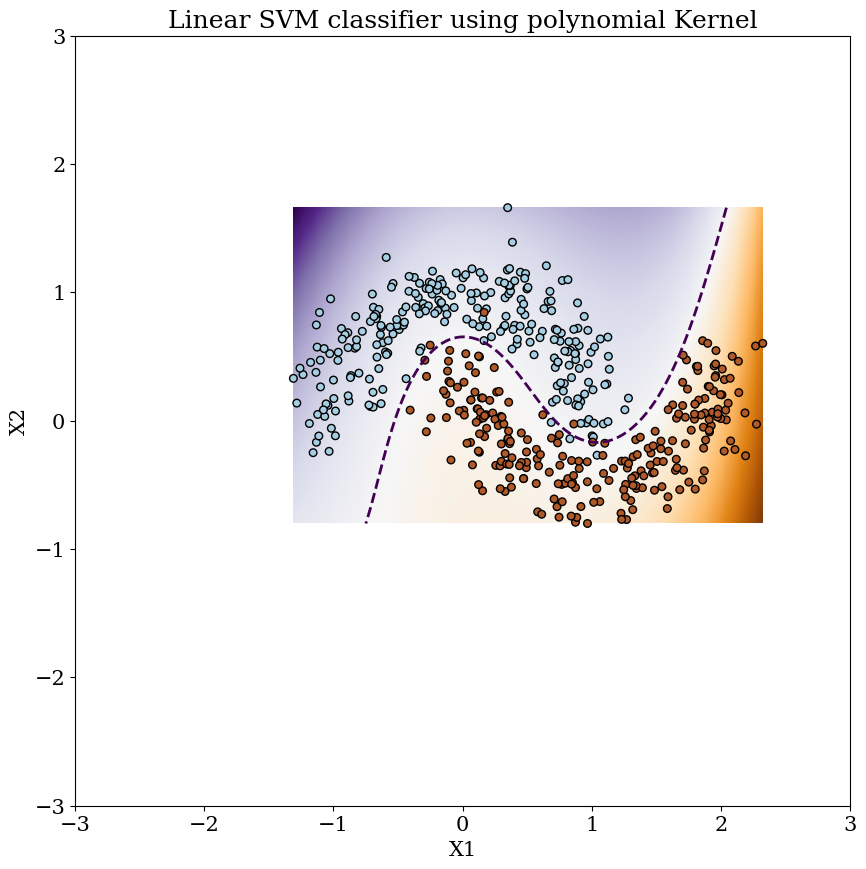

In [25]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 500))

Z_poly = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_poly,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier using polynomial Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Plot the decision function for RBF kernel

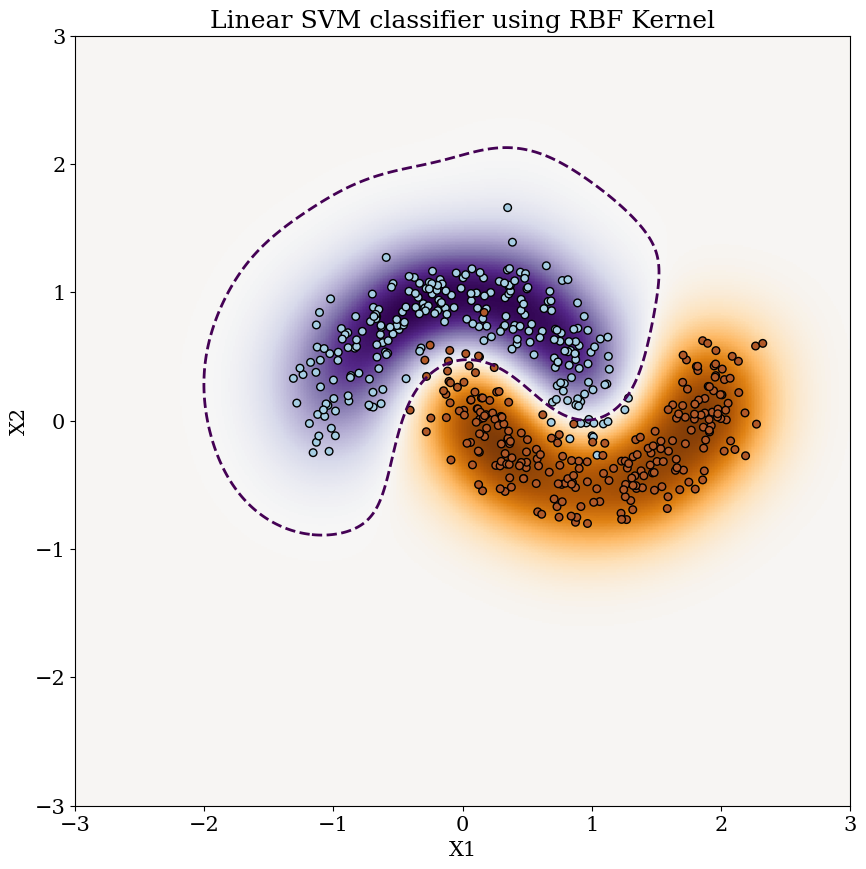

In [26]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)


Z_rbf = clf_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_rbf,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_rbf, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier using RBF Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Plot the decision function for Sigmoid kernel

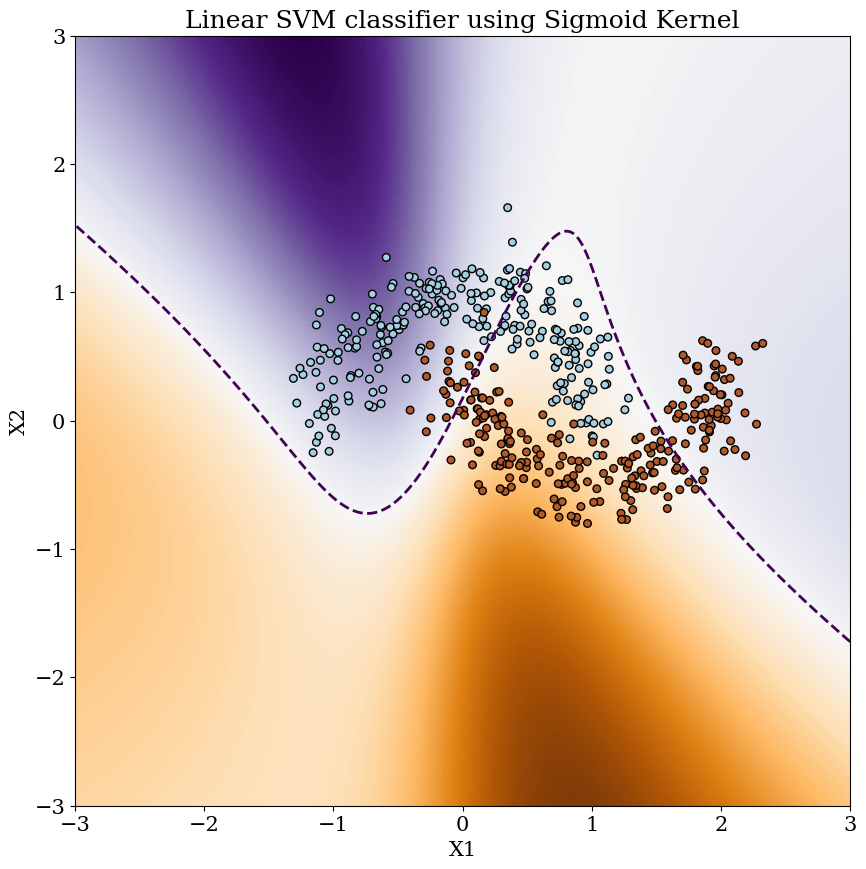

In [27]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)


Z_s = clf_sigmoid.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_s = Z_s.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_s,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_s, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier using Sigmoid Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
